# Introduction to Linear Regression

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Generate Some Data

# How Many Samples?
n = 200

# Create an artificial INDEPENDANT Variable
x = np.random.sample(n)*20

# Add 50 to each sample 
a = np.random.sample(n)*20 + 50

# Set Your Slope 
b = 3.5

# Calculate your DEPENDANT Variable 
y = b*x + a

# We don't add the random error to our dataset, in real life it is unknown
# We also don't know b apriori. b is exactly what we want to find
# And the 'expected value' of a

# Cast Into A Dataframe
df = pd.DataFrame({'feature1':x})

(200, 2)


,feature1,target
0,2.768717,70.573283
1,16.127617,109.001919
2,10.193025,88.685467
3,17.498514,112.798433
4,15.186021,114.033344


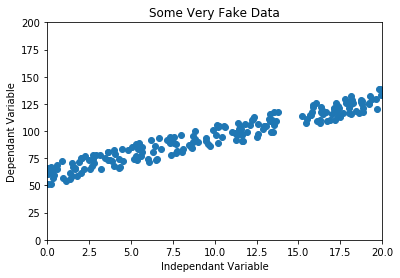

In [23]:
# Having a look at the data

# Assign Y to be our Target Variable 
df['target'] = y


fig, ax = plt.subplots()

ax.scatter(x,y)

xmin = 0
xmax = 20
ymin = 0
ymax = 200

axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

plt.title("Some Very Fake Data")
plt.xlabel("Independant Variable")
plt.ylabel("Dependant Variable")


print(df.shape)
df.head()

In [24]:
# Pre-processing 

# Here We separarte our Variables 

X = df.drop('target',axis=1)
y = df['target']

### Regression in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [25]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True)

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_b = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(b,est_b.round(4)))

R2 = 0.93
constant: 61.1632
coeficients: real 3.5 vs [3.4211] estimated


### Regression in [Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) and its [Interpretation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

In [26]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.93
const       61.1632
feature1     3.4211
dtype: float64


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Statsmodels superpower

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2511.
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          1.92e-114
Time:                        17:12:40   Log-Likelihood:                -637.25
No. Observations:                 200   AIC:                             1279.
Df Residuals:                     198   BIC:                             1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.1632      0.793     77.108      0.000      59.599      62.727
feature1       3.4211      0.068     50.115      0.000       3.287       3.556
==============================================================================
Omnibus:                       61.666   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.888
Skew:                          -0.107   Prob(JB):                      0.00432
Kurtosis:                       1.877   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Your Turn!

Use the next 15 minutes to recreate (literally copy and paste as much as you can!) to attempt to predict a sheep's weight from their fatness. 

Run this model with statsmodels and plot your data!

Depending on the breed, it depends on how much an average sheep weighs! 

According to https://thesheepsite.com/focus/5m/99/global-sheep-meat-market-thesheepsite there are 1 billion sheep in the world. For this reason, i'm going to do a sample size of about 200. 

I need to identify the slope. I will do this by picking two random points that I will assume to be within the sample set of the sheep. The x will be the fatness of the sheep and the y will be the weight of the sheep. The (3,70) and (5, 160)

When given this problem I first think of how this should be layed out in terms of sample size, slope. I also visualise 
whether this will be directly related. Which it will be. I then want to put this in to a visual. I don't know a lot about
sheeps but just from a 2 minute google search I know that this will be wildly inaccurate. 

In [50]:
# Generate Some Data

# How Many Samples?
n = 200

# Create an artificial INDEPENDANT Variable
x = np.random.sample(n)*200

# Add 50 to each sample 
a = 50

# Set Your Slope 
b = 4.5

# Calculate your DEPENDANT Variable 
y = b*x + a

# We don't add the random error to our dataset, in real life it is unknown
# We also don't know b apriori. b is exactly what we want to find
# And the 'expected value' of a

# Cast Into A Dataframe
df = pd.DataFrame({'fatness':x})

So above I originally tried my slope of 45, it didn't process it after about 10 minutes, I assumed it was too big or too inaccurate for the what we're trying to model/achieve. So I changed the slope to 4.5 Another thing I noticed, thanks to Javi is that `a` should be a constant number. In the above example `a = np.random.sample(n)*20 + 50` which really doesn't place nicely when I try to run my code. Javi informed me that it should just be a number. So I swtiched this to be 50. (sheeps range in weight from 40 to 160 kg!)

(200, 2)


,fatness,weight
0,34.430789,204.938550
1,28.721322,179.245949
2,151.033586,729.651137
3,169.430759,812.438413
4,152.473944,736.132750


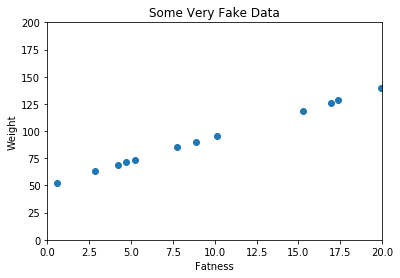

In [51]:
# Having a look at the data

# Assign Y to be our Target Variable 
df['weight'] = y


fig, ax = plt.subplots()

ax.scatter(x,y)

xmin = 0
xmax = 20
ymin = 0
ymax = 200

axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

plt.title("Some Very Fake Data")
plt.xlabel("Fatness")
plt.ylabel("Weight")


print(df.shape)
df.head()

In [52]:
X = df.drop('fatness',axis=1)
y = df['fatness']

In [53]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True)

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_b = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(b,est_b.round(4)))

R2 = 1.0
constant: -11.1111
coeficients: real 4.5 vs [0.2222] estimated


In [54]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 1.0
const    -11.1111
weight     0.2222
dtype: float64


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                fatness   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.483e+32
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:51:22   Log-Likelihood:                 5785.8
No. Observations:                 200   AIC:                        -1.157e+04
Df Residuals:                     198   BIC:                        -1.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1111   1.08e-14  -1.03e+15      0.000     -11.111     -11.111
weight         0.2222   1.82e-17   1.22e+16      0.000       0.222       0.222
==============================================================================
Omnibus:                       47.145   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.235
Skew:                          -0.151   Prob(JB):                      0.00599
Kurtosis:                       1.934   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By looking at the `const` and the `weight` I know I did something wrong here. Also the weight should not be so low. 